In [3]:
import numpy as np
!pip install shap
import pandas as pd
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
import shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   -- ------------------------------------- 30.7/456.1 kB ? eta -:--:--
   -- ------------------------------------- 30.7/456.1 kB ? eta -:--:--
   --- ----------------------------------- 41.0/456.1 kB 495.5 kB/s eta 0:00:01
   ------- ------------------------------- 81.9/456.1 kB 508.4 kB/s eta 0:00:01
   ------- ------------------------------- 92.2/456.1 kB 476.3 kB/s eta 0:00:01
   --------- ---------------------------- 112.6/456.1 kB 504.4 kB/s eta 0:00:01
   ----------- -------------------------- 143.4/456.1 kB 500.5 kB/s eta 0:00:01
   ------------- ------------------------ 163.8/456.1 kB 492.3 kB/s eta 0:00:01
   -------------- ----------------------- 174.1/456.1 kB 476.3 kB/s eta 0:00:01
   ---------------- --------------------- 194.6/456.1 kB 491.5 kB/s eta 0:00

In [4]:
X, y = make_multilabel_classification(n_samples=1000, n_features=20, n_classes=3, n_labels=2, random_state=42)

In [5]:
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
y = pd.DataFrame(y, columns=['disease_1', 'disease_2', 'disease_3'])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = OneVsRestClassifier(RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

In [8]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=y.columns))

Classification Report:
               precision    recall  f1-score   support

   disease_1       0.95      0.64      0.76        85
   disease_2       0.92      0.87      0.90       126
   disease_3       0.87      0.83      0.85       111

   micro avg       0.91      0.80      0.85       322
   macro avg       0.91      0.78      0.84       322
weighted avg       0.91      0.80      0.84       322
 samples avg       0.78      0.70      0.72       322



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SHAP Summary Plot for Label: disease_1


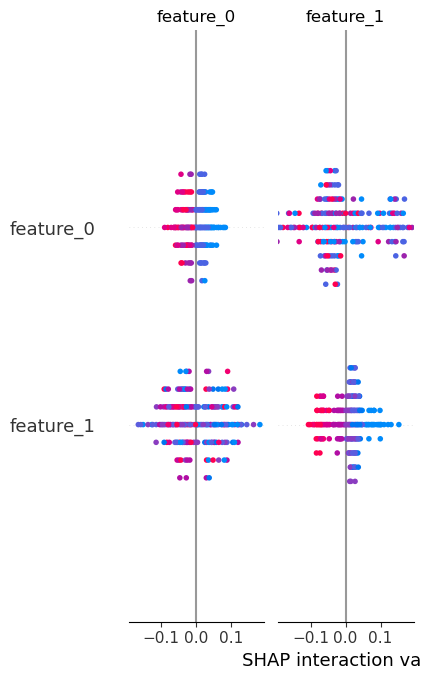

SHAP Summary Plot for Label: disease_2


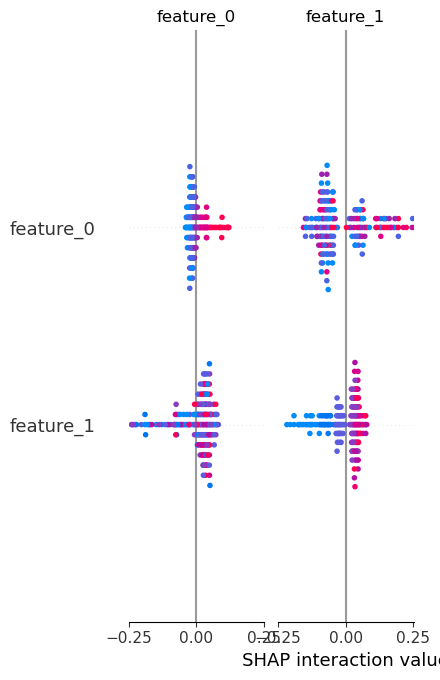

SHAP Summary Plot for Label: disease_3


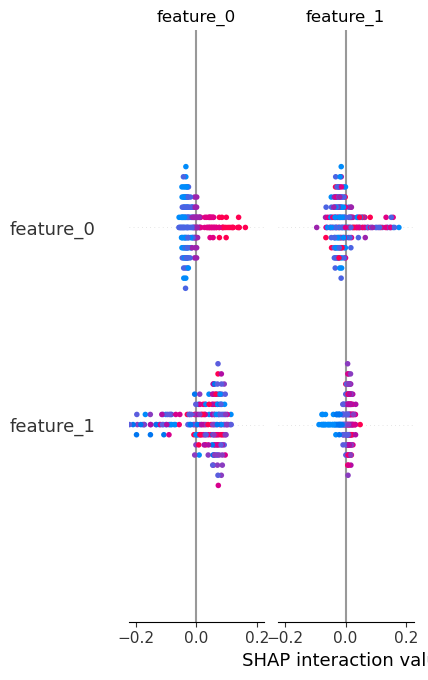

In [11]:
for i, clf in enumerate(model.estimators_):
    explainer = shap.TreeExplainer(clf) 
    shap_values = explainer.shap_values(X_test) 

    print(f"SHAP Summary Plot for Label: {y.columns[i]}")
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)